<a href="https://colab.research.google.com/github/Roshni-AngelAlex/MACHINE-LEARNING-LAB-24ADI003-/blob/main/MLLABEX4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Probabilistic Classification using Naïve Bayes
(Gaussian & Multinomial Naïve Bayes)**


**LAB EXPERIMENT 4**

**NAME:ROSHNI ANGEL A / ROLLNO:24BAD101**

SCENARIO 1 – MULTINOMIAL NAÏVE BAYES

Problem Statement:

Classify SMS messages as Spam or Ham (Not Spam).


**Dataset (Kaggle – Public)**

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

NAME:ROSHNI ANGEL A,ROLLNO:24BAD101

===== MODEL PERFORMANCE =====
Accuracy : 0.968609865470852
Precision: 1.0
Recall   : 0.7666666666666667
F1 Score : 0.8679245283018868

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



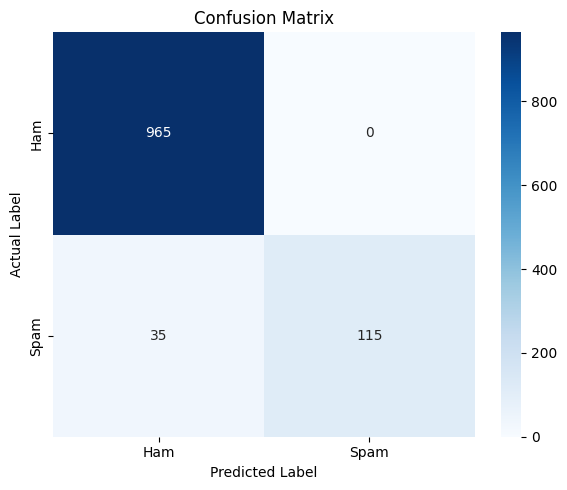

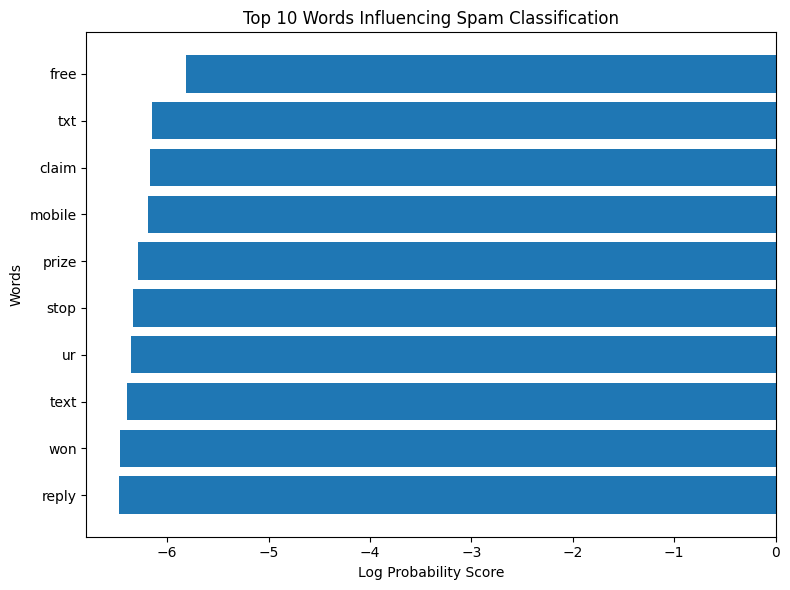

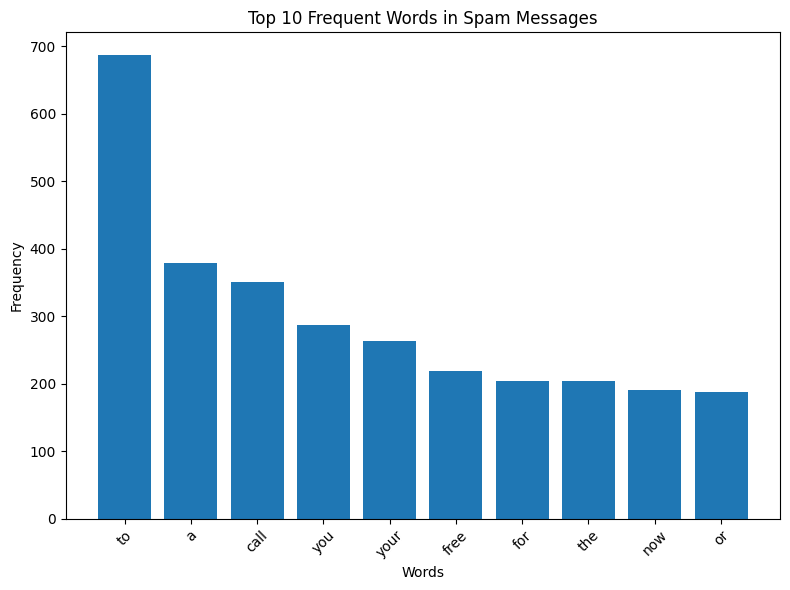

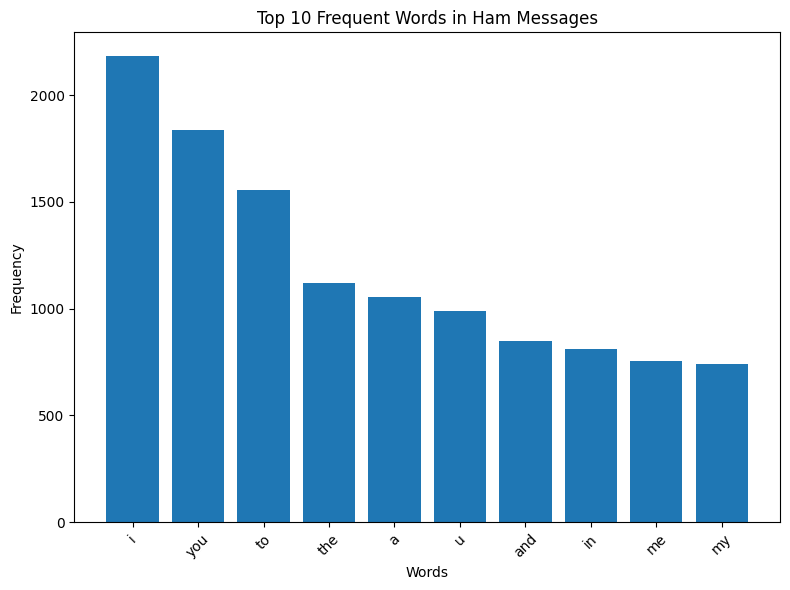


Sample Misclassified Messages:
Actual: spam
Predicted: ham
Message: free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs
--------------------------------------------------
Actual: spam
Predicted: ham
Message: k tell me anything about you
--------------------------------------------------
Actual: spam
Predicted: ham
Message: gud mrng dear hav a nice day
--------------------------------------------------
Actual: spam
Predicted: ham
Message: there is os called ubandu which will run without installing in hard diskyou can use that os to copy the important files in system and give it to repair shop
--------------------------------------------------
Actual: spam
Predicted: ham
Message: would really appreciate if you call me just need someone to talk to
--------------------------------------------------


In [1]:
# EXPT NO: 4
# Multinomial Naïve Bayes – SMS Spam Detection

# 1. Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
print("NAME:ROSHNI ANGEL A,ROLLNO:24BAD101")

# 2. Load Dataset (IMPORTANT: encoding fixed)
data = pd.read_csv(
    "/content/spam.csv",
    encoding='latin-1'
)

# Keep only needed columns
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# 3. Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)   # remove punctuation & numbers
    return text

data['message'] = data['message'].apply(clean_text)

# 4. Convert Text to TF-IDF Features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['message'])

# 5. Encode Target Labels
encoder = LabelEncoder()
y = encoder.fit_transform(data['label'])   # ham=0, spam=1

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Train Multinomial Naïve Bayes (Laplace smoothing alpha=1)
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

# 8. Prediction
y_pred = model.predict(X_test)

# 9. Evaluation Metrics
print("\n===== MODEL PERFORMANCE =====")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# VISUALIZATION 1: CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Ham', 'Spam'],
    yticklabels=['Ham', 'Spam']
)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()


# VISUALIZATION 2: FEATURE IMPORTANCE (TOP SPAM WORDS)

feature_names = vectorizer.get_feature_names_out()

spam_class_index = 1
spam_log_probs = model.feature_log_prob_[spam_class_index]

top_n = 10
top_indices = np.argsort(spam_log_probs)[-top_n:]

top_words = feature_names[top_indices]
top_scores = spam_log_probs[top_indices]

# Sort for clean horizontal graph
sorted_order = np.argsort(top_scores)
top_words = top_words[sorted_order]
top_scores = top_scores[sorted_order]

plt.figure(figsize=(8,6))
plt.barh(top_words, top_scores)

plt.title("Top 10 Words Influencing Spam Classification")
plt.xlabel("Log Probability Score")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

# VISUALIZATION 3: WORD FREQUENCY COMPARISON

spam_messages = data[data['label'] == 'spam']['message']
ham_messages = data[data['label'] == 'ham']['message']

spam_words = Counter(" ".join(spam_messages).split())
ham_words = Counter(" ".join(ham_messages).split())

top_spam = spam_words.most_common(10)
top_ham = ham_words.most_common(10)

spam_w, spam_c = zip(*top_spam)
ham_w, ham_c = zip(*top_ham)

# Plot Spam Word Frequency
plt.figure(figsize=(8,6))
plt.bar(spam_w, spam_c)

plt.title("Top 10 Frequent Words in Spam Messages")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Ham Word Frequency
plt.figure(figsize=(8,6))
plt.bar(ham_w, ham_c)

plt.title("Top 10 Frequent Words in Ham Messages")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10. Misclassified Examples

misclassified = np.where(y_test != y_pred)

print("\nSample Misclassified Messages:")
for i in misclassified[0][:5]:
    print("Actual:", encoder.inverse_transform([y_test[i]])[0])
    print("Predicted:", encoder.inverse_transform([y_pred[i]])[0])
    print("Message:", data.iloc[i]['message'])
    print("-" * 50)



SCENARIO 2 – GAUSSIAN NAÏVE BAYES

Problem Statement:

Classify flower species based on physical measurements.


Dataset (Public / Standard Dataset)

Iris Dataset (sklearn)



NAME:ROSHNI ANGEL A,ROLLNO:24BAD101
First 5 Rows of Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150

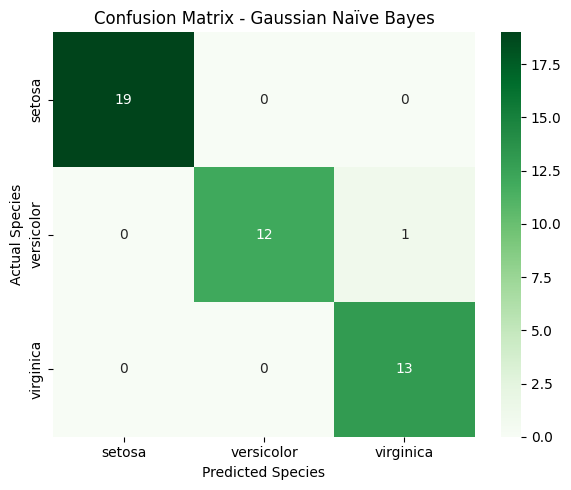


Comparison (First 10 rows):
   Actual  Predicted
0       1          1
1       0          0
2       2          2
3       1          1
4       1          1
5       0          0
6       1          1
7       2          2
8       1          1
9       1          1

Sample Class Probabilities (First 5 rows):
[[4.15877025e-088 9.95527834e-001 4.47216553e-003]
 [1.00000000e+000 1.31031120e-013 2.21772081e-020]
 [9.83135514e-285 2.70138384e-012 1.00000000e+000]
 [9.54732794e-092 9.74861432e-001 2.51385679e-002]
 [1.08678364e-103 8.31910709e-001 1.68089291e-001]]


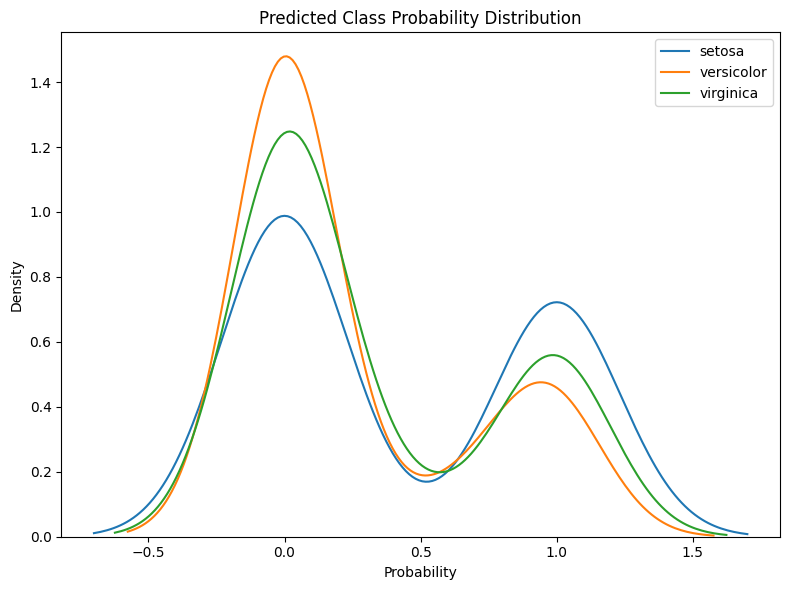

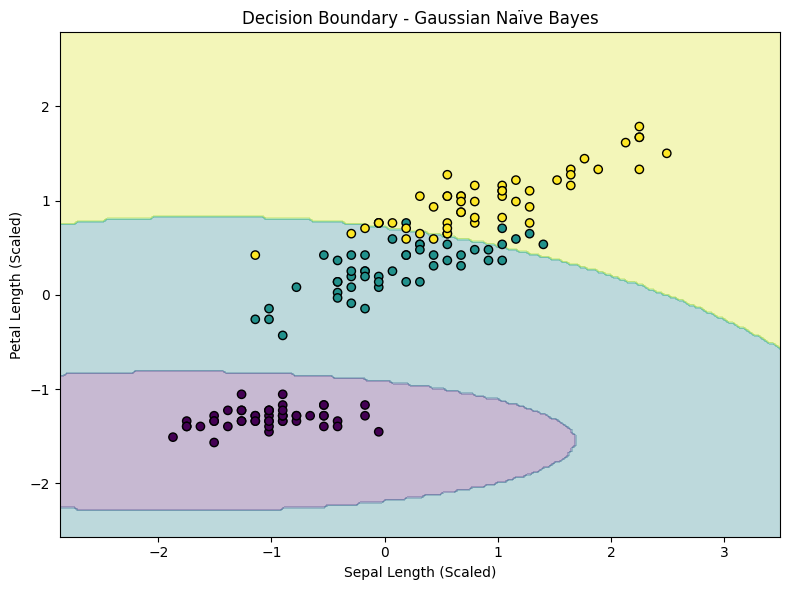


===== LOGISTIC REGRESSION PERFORMANCE =====
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


In [2]:
# EXPT NO: 5
# Gaussian Naïve Bayes – Iris Classification

# 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

print("NAME:ROSHNI ANGEL A,ROLLNO:24BAD101")

# 2. Load Iris Dataset
iris = load_iris()

X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for inspection
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

print("First 5 Rows of Dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nClass Distribution:")
print(df['species'].value_counts())

# 3. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 5. Train Gaussian Naïve Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 6. Predict Species
y_pred = gnb.predict(X_test)

# 7. Evaluation Metrics
print("\n GAUSSIAN NAÏVE BAYES PERFORMANCE ")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names,
            yticklabels=target_names)

plt.title("Confusion Matrix - Gaussian Naïve Bayes")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.tight_layout()
plt.show()

# 9. Compare Predictions with Actual
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

print("\nComparison (First 10 rows):")
print(comparison.head(10))

# 10. Analyze Class Probabilities
probs = gnb.predict_proba(X_test)

print("\nSample Class Probabilities (First 5 rows):")
print(probs[:5])

# Probability Distribution Plot
plt.figure(figsize=(8,6))
for i in range(len(target_names)):
    sns.kdeplot(probs[:, i], label=target_names[i])

plt.title("Predicted Class Probability Distribution")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# DECISION BOUNDARY (Using 2 Features)
# Sepal Length & Petal Length

X_two = X_scaled[:, [0, 2]]  # Selecting 2 features

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_two, y, test_size=0.3, random_state=42
)

model2 = GaussianNB()
model2.fit(X_train2, y_train2)

# Create mesh grid
x_min, x_max = X_two[:, 0].min() - 1, X_two[:, 0].max() + 1
y_min, y_max = X_two[:, 1].min() - 1, X_two[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_two[:, 0], X_two[:, 1], c=y, edgecolor='k')

plt.title("Decision Boundary - Gaussian Naïve Bayes")
plt.xlabel("Sepal Length (Scaled)")
plt.ylabel("Petal Length (Scaled)")
plt.tight_layout()
plt.show()



# Compare with Logistic Regression

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("\n===== LOGISTIC REGRESSION PERFORMANCE =====")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_lr, average='weighted'))
